HEART

- The goal is to predict the presence of heart diease in patient

In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset - Heart.csv
df = pd.read_csv(r'C:\Users\user\Documents\DATA ANALYSIS FILES\10ALYTICS\Excel-CSV/heart.csv')

In [3]:
#view data (first 5 rows)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#view data (bottom 5 rows)
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


The features in the dataset and meaning:

- age: age in years,
- sex: (1 = male; 0 = female),
- cp: chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),
- trestbps: resting blood pressure (in mm Hg on admission to the hospital),
- chol: serum cholestoral in mg/dl,
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),
- restecg: resting electrocardiographic results,
- thalach: maximum heart rate achieved,
- exang: exercise induced angina (1 = yes; 0 = no),
- oldpeak: ST depression induced by exercise relative to rest,
- slope: the slope of the peak exercise ST segment,
- ca: number of major vessels (0-3) colored by flourosopy,
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,
- target: have disease or not (1=yes, 0=no).

In [5]:
# Rename the column headers
df.columns = ["age", "sex", "chest_pain", "resting_blood_pressure", "cholestrol", "fasting_blood_sugar", "rest_ecg","max_heart_rate", 
              "exercise_induced_agina", "st_depression", "st_slope", "no_major_vassels", "thalassemia", "target"]

df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_agina,st_depression,st_slope,no_major_vassels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Data verification 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   chest_pain              303 non-null    int64  
 3   resting_blood_pressure  303 non-null    int64  
 4   cholestrol              303 non-null    int64  
 5   fasting_blood_sugar     303 non-null    int64  
 6   rest_ecg                303 non-null    int64  
 7   max_heart_rate          303 non-null    int64  
 8   exercise_induced_agina  303 non-null    int64  
 9   st_depression           303 non-null    float64
 10  st_slope                303 non-null    int64  
 11  no_major_vassels        303 non-null    int64  
 12  thalassemia             303 non-null    int64  
 13  target                  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

In [7]:
# Statistical analysis
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_agina,st_depression,st_slope,no_major_vassels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Missing values
df.isnull().sum()

age                       0
sex                       0
chest_pain                0
resting_blood_pressure    0
cholestrol                0
fasting_blood_sugar       0
rest_ecg                  0
max_heart_rate            0
exercise_induced_agina    0
st_depression             0
st_slope                  0
no_major_vassels          0
thalassemia               0
target                    0
dtype: int64

<AxesSubplot:title={'center':'Visualizing missing values in the dataset'}>

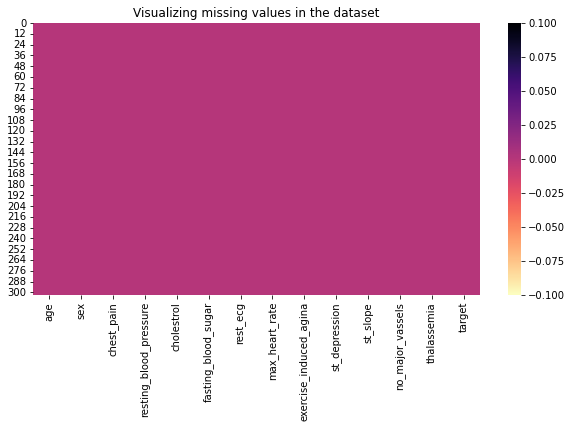

In [9]:
# Visualize the missing values

plt.figure(figsize = (10,5))
plt.title('Visualizing missing values in the dataset')
sns.heatmap(df.isnull(), cbar=True, cmap='magma_r')

### Exploratory Data Analysis

In [10]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_agina,st_depression,st_slope,no_major_vassels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0, 0.5, 'Count of age group')

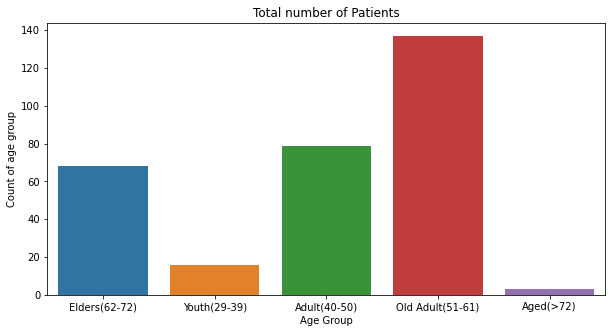

In [11]:
# Age

# create a function that categorises patient age
def age_bracket(age):
    if age <= 39:
        return "Youth(29-39)"
    elif age <=50:
        return "Adult(40-50)"
    elif age <=61:
        return "Old Adult(51-61)"
    elif age <= 72:
        return "Elders(62-72)"
    else: 
        return "Aged(>72)"

    
# Create a new column for age category
df["age_group"] = df["age"].apply(age_bracket)

# Visualize patient age
plt.figure(figsize = (10,5))
sns.countplot(x="age_group", data=df)
plt.title("Total number of Patients")
plt.xlabel("Age Group")
plt.ylabel("Count of age group")

Text(0, 0.5, 'Count of gender')

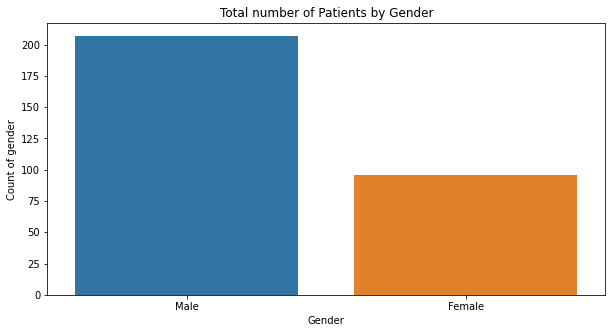

In [12]:
# Sex (1 = Male, 0 = Female)

# Create Function that categorise gender
def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
    
df['gender'] = df['sex'].apply(gender)

# Visualize patient gender
plt.figure(figsize = (10,5))
sns.countplot(x="gender", data=df)
plt.title("Total number of Patients by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of gender")

Text(0, 0.5, 'Count of age group')

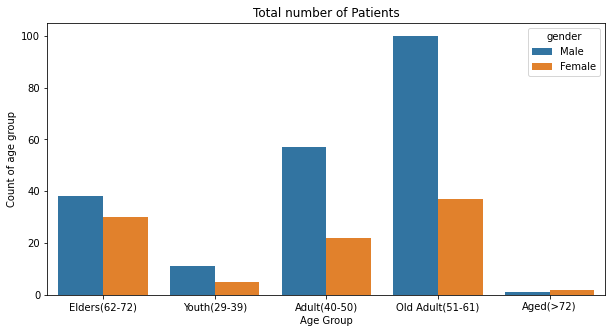

In [13]:
# Visualize patient age and gender

plt.figure(figsize = (10,5))
sns.countplot(x="age_group", data=df, hue="gender")
plt.title("Total number of Patients")
plt.xlabel("Age Group")
plt.ylabel("Count of age group")

Text(0, 0.5, 'Count of chest pain')

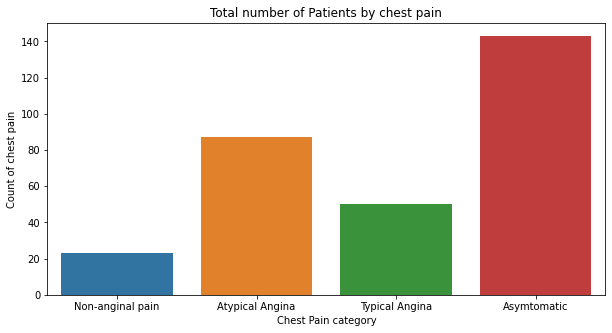

In [14]:
# chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

# Create a function
def pain_category(cp):
    if cp == 1:
        return "Typical Angina"
    elif cp == 2:
        return "Atypical Angina"
    elif cp == 3:
        return "Non-anginal pain"
    else:    
        return "Asymtomatic"
    
# Create a new column and apply the function
df["chest_pain_category"] = df["chest_pain"].apply(pain_category)
df.head()

# Visualize Patient chest pain category
plt.figure(figsize = (10,5))
sns.countplot(x="chest_pain_category", data=df)
plt.title("Total number of Patients by chest pain")
plt.xlabel("Chest Pain category")
plt.ylabel("Count of chest pain")

Text(0, 0.5, 'Count of chest pain')

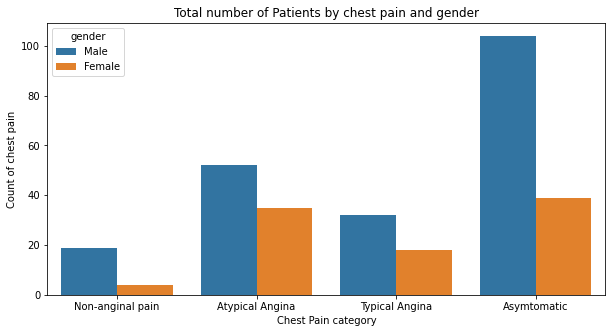

In [15]:
# Visualize Patient chest pain category and gender
plt.figure(figsize = (10,5))
sns.countplot(x="chest_pain_category", data=df, hue="gender")
plt.title("Total number of Patients by chest pain and gender")
plt.xlabel("Chest Pain category")
plt.ylabel("Count of chest pain")

Text(0, 0.5, 'Count of chest pain')

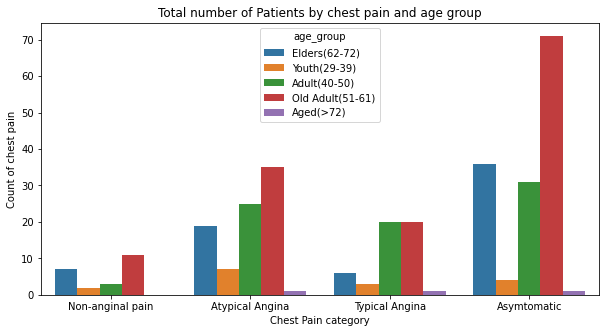

In [16]:
# Visualize Patient chest pain category and age group
plt.figure(figsize = (10,5))
sns.countplot(x="chest_pain_category", data=df, hue="age_group")
plt.title("Total number of Patients by chest pain and age group")
plt.xlabel("Chest Pain category")
plt.ylabel("Count of chest pain")

<AxesSubplot:>

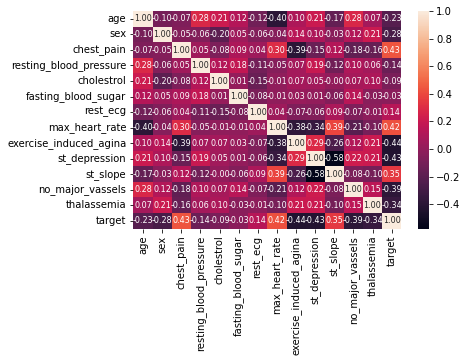

In [17]:
# Correlation analysis

correl = df.corr()

# num = 10

# cols = correl.nlargest(num, "target")["target"].index
sns.heatmap(correl, cbar=True, annot=True,fmt=".2f", annot_kws={'size':8})

In [18]:
# Machine Learning

from sklearn.model_selection import train_test_split

#ML Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#ML Metrics
from sklearn.metrics import accuracy_score

# To disable warnings
import warnings
warnings.filterwarnings("ignore")

In [19]:
# data = X
X = df[['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_agina', 'st_depression', 'st_slope',
       'no_major_vassels', 'thalassemia',]]

# Label = y
y = df[['target']]

In [20]:
# Load three ML Algorithms
classifiers = [[RandomForestClassifier(), "Random Forest"], [KNeighborsClassifier(),"K-Nearest Neighbors"], 
               [LogisticRegression(), "Logistics Regression"]]

In [25]:
# Train Test Split (Training on 80% while Testing is 20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

accuracy_score_list = {}

for i in classifiers:
    model = i[0]
    model.fit(X_train, y_train)
    model_name= i[1]
    
    predict = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predict)
    
    accuracy_score_list[model_name] = ([str(round(accuracy * 100, 2)) + "%"])
    
    if model_name != classifiers[-1][1]:
        print('')

In [26]:
print("Accuracy Score of ML Algorithms")
as_df = pd.DataFrame(accuracy_score_list)
as_df

Accuracy Score of ML Algorithms


,Random Forest,K-Nearest Neighbors,Logistics Regression
0,81.97%,77.05%,85.25%
